# Import necessary libraries

In [24]:
#Load important libraries
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests

# Connect to the datasource

In [15]:
#Load in all match events 
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3906390.json')
events = events.json()
events

[{'id': '73d302be-c474-47b0-b465-d276046f96a5',
  'index': 1,
  'period': 1,
  'timestamp': '00:00:00.000',
  'minute': 0,
  'second': 0,
  'type': {'id': 35, 'name': 'Starting XI'},
  'possession': 1,
  'possession_team': {'id': 863, 'name': "Spain Women's"},
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'team': {'id': 863, 'name': "Spain Women's"},
  'duration': 0.0,
  'tactics': {'formation': 4231,
   'lineup': [{'player': {'id': 45295, 'name': 'Catalina Thomas Coll Lluch'},
     'position': {'id': 1, 'name': 'Goalkeeper'},
     'jersey_number': 23},
    {'player': {'id': 46639, 'name': 'Ona Batlle Pascual'},
     'position': {'id': 2, 'name': 'Right Back'},
     'jersey_number': 2},
    {'player': {'id': 10165, 'name': 'Irene Paredes Hernandez'},
     'position': {'id': 3, 'name': 'Right Center Back'},
     'jersey_number': 4},
    {'player': {'id': 32694, 'name': 'Laia Codina Panedas'},
     'position': {'id': 5, 'name': 'Left Center Back'},
     'jersey_number': 14},
   

# Transform data to DataFrame

In [16]:
#Transform JSON into a dataframe 
df = json_normalize(events)

# Displaying all columns for wide DataFrames
pd.set_option("display.max.columns", None)

df.head()

id  index  period     timestamp  minute  \
0  73d302be-c474-47b0-b465-d276046f96a5      1       1  00:00:00.000       0   
1  cbad5dd0-01cd-4be0-8693-15942b19d363      2       1  00:00:00.000       0   
2  62cea4b4-febc-4df9-8df0-a134ed91e70f      3       1  00:00:00.000       0   
3  ebcc30be-9a0a-4f38-b241-8c8dd9834589      4       1  00:00:00.000       0   
4  30728cd8-f0a6-4535-8f24-16a37a1d4f08      5       1  00:00:00.563       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1  0.000000       35  Starting XI                 863   
1       0           1  0.000000       35  Starting XI                 863   
2       0           1  0.000000       18   Half Start                 863   
3       0           1  0.000000       18   Half Start                 863   
4       0           2  0.781021       30         Pass                 865   

  possession_team.name  play_pattern.id play_pattern.name  team.id  \
0        Spain Women's                1      Regular Play      863   
1        Spain Women's                1      Regular Play      865   
2        Spain Women's                1      Regular Play      865   
3        Spain Women's                1      Regular Play      863   
4      England Women's                9     From Kick Off      865   

         team.name  tactics.formation  \
0    Spain Women's             4231.0   
1  England Women's             3412.0   
2  England Women's                NaN   
3    Spain Women's                NaN   
4  England Women's                NaN   

                                      tactics.lineup  \
0  [{'player': {'id': 45295, 'name': 'Catalina Th...   
1  [{'player': {'id': 31538, 'name': 'Mary Alexan...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                           related_events      location  player.id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [ebcc30be-9a0a-4f38-b241-8c8dd9834589]           NaN        NaN   
3  [62cea4b4-febc-4df9-8df0-a134ed91e70f]           NaN        NaN   
4  [b796b4f0-d521-4d6a-903e-b63c45120ec9]  [61.0, 40.1]    31534.0   

  player.name  position.id              position.name  pass.recipient.id  \
0         NaN          NaN                        NaN                NaN   
1         NaN          NaN                        NaN                NaN   
2         NaN          NaN                        NaN                NaN   
3         NaN          NaN                        NaN                NaN   
4  Ella Toone         19.0  Center Attacking Midfield             4658.0   

  pass.recipient.name  pass.length  pass.angle  pass.height.id  \
0                 NaN          NaN         NaN             NaN   
1                 NaN          NaN         NaN             NaN   
2                 NaN          NaN         NaN             NaN   
3                 NaN          NaN         NaN             NaN   
4         Keira Walsh    10.080674   -2.951979             1.0   

  pass.height.name pass.end_location  pass.body_part.id pass.body_part.name  \
0              NaN               NaN                NaN                 NaN   
1              NaN               NaN                NaN                 NaN   
2              NaN               NaN                NaN                 NaN   
3              NaN               NaN                NaN                 NaN   
4      Ground Pass      [51.1, 38.2]               40.0          Right Foot   

   pass.type.id pass.type.name carry.end_location  pass.outcome.id  \
0           NaN            NaN                NaN              NaN   
1           NaN            NaN                NaN              NaN   
2           NaN            NaN                NaN              NaN   
3           NaN            NaN                NaN         

# Filter out necessary data

In [17]:
#Filtering passes made by France

spain_passes = df.loc[(df['type.name'] == 'Pass') & (df['possession_team.name'] == "Spain Women's")]

#Let's look what we got

spain_passes.tail(10)

id  index  period     timestamp  \
3454  85d09184-87d7-4864-9ea7-ce17770edf32   3455       2  00:52:51.520   
3460  a557f329-1b4e-4216-a28c-b25ac1c8119d   3461       2  00:53:32.598   
3462  b85c30ba-acb6-4712-9058-f86ee2c38262   3463       2  00:54:13.816   
3513  9ea2769f-18c2-49c7-b37d-971dac9fa173   3514       2  00:55:36.134   
3516  6264280b-55ae-499c-9e97-1c8070be5ca5   3517       2  00:55:36.954   
3520  219bc9c4-b7f5-4001-8963-44366fa0325a   3521       2  00:55:43.297   
3526  326d2b94-45cd-4016-bf6b-8e612b58e723   3527       2  00:56:24.318   
3540  c4152ad1-3e24-432f-9ea9-be9fdbf9f430   3541       2  00:56:53.577   
3544  ad2a011d-1371-484f-8093-b9f82bbec3d3   3545       2  00:56:55.067   
3551  c7bdf4d0-2eda-4c4c-83f2-043aae2ff684   3552       2  00:57:38.920   

      minute  second  possession  duration  type.id type.name  \
3454      97      51         187  0.619216       30      Pass   
3460      98      32         188  2.440158       30      Pass   
3462      99      13         189  1.986679       30      Pass   
3513     100      36         192  0.779596       30      Pass   
3516     100      36         192  3.300647       30      Pass   
3520     100      43         192  0.689799       30      Pass   
3526     101      24         193  3.771395       30      Pass   
3540     101      53         196  1.180523       30      Pass   
3544     101      55         196  1.000813       30      Pass   
3551     102      38         197  2.901847       30      Pass   

      possession_team.id possession_team.name  play_pattern.id  \
3454                 863        Spain Women's                6   
3460                 863        Spain Women's                2   
3462                 863        Spain Women's                2   
3513                 863        Spain Women's                1   
3516                 863        Spain Women's                1   
3520                 863        Spain Women's                1   
3526                 863        Spain Women's                3   
3540                 863        Spain Women's                1   
3544                 863        Spain Women's                1   
3551                 863        Spain Women's                3   

     play_pattern.name  team.id      team.name  tactics.formation  \
3454      From Counter      863  Spain Women's                NaN   
3460       From Corner      863  Spain Women's                NaN   
3462       From Corner      863  Spain Women's                NaN   
3513      Regular Play      863  Spain Women's                NaN   
3516      Regular Play      863  Spain Women's                NaN   
3520      Regular Play      863  Spain Women's                NaN   
3526    From Free Kick      863  Spain Women's                NaN   
3540      Regular Play      863  Spain Women's                NaN   
3544      Regular Play      863  Spain Women's                NaN   
3551    From Free Kick      863  Spain Women's                NaN   

     tactics.lineup                                     related_events  \
3454            NaN             [47b9e170-df15-40b5-b9bb-d9b7039890a8]   
3460            NaN             [d2e0afaf-886e-41b9-af7f-2a31ae74eceb]   
3462            NaN  [6ef6c4f4-5949-4589-9642-70e994ee1aa3, 99575de...   
3513            NaN  [c343bc1d-5aea-4a93-8b88-286576a81ead, d65f949...   
3516            NaN             [db9f304e-8c57-43ac-9f39-6352b949f53f]   
3520            NaN  [90046c9b-3135-48c2-9683-28c48261d18c, ae92fd1...   
3526            NaN             [2f70d116-0050-48b0-95d2-a8f02110b79d]   
3540            NaN  [a66e3b74-4cb0-42e0-9eb3-6d986c7e7635, c572443...   
3544            NaN  [1e099bb3-422d-4b84-abb4-a81f7116a8cc, 3228aa0...   
3551            NaN             [bf1fc963-4387-4cd7-9197-1ba6ebdbadeb]   

           location  player.id                player.name  position.id  \
3454   [93.9, 35.7]    49835.0    Teresa Abelleira Dueñas         10.0   
3460   [120.0, 0.1]    49835.0    Teresa Abellei

# Draw a pitch

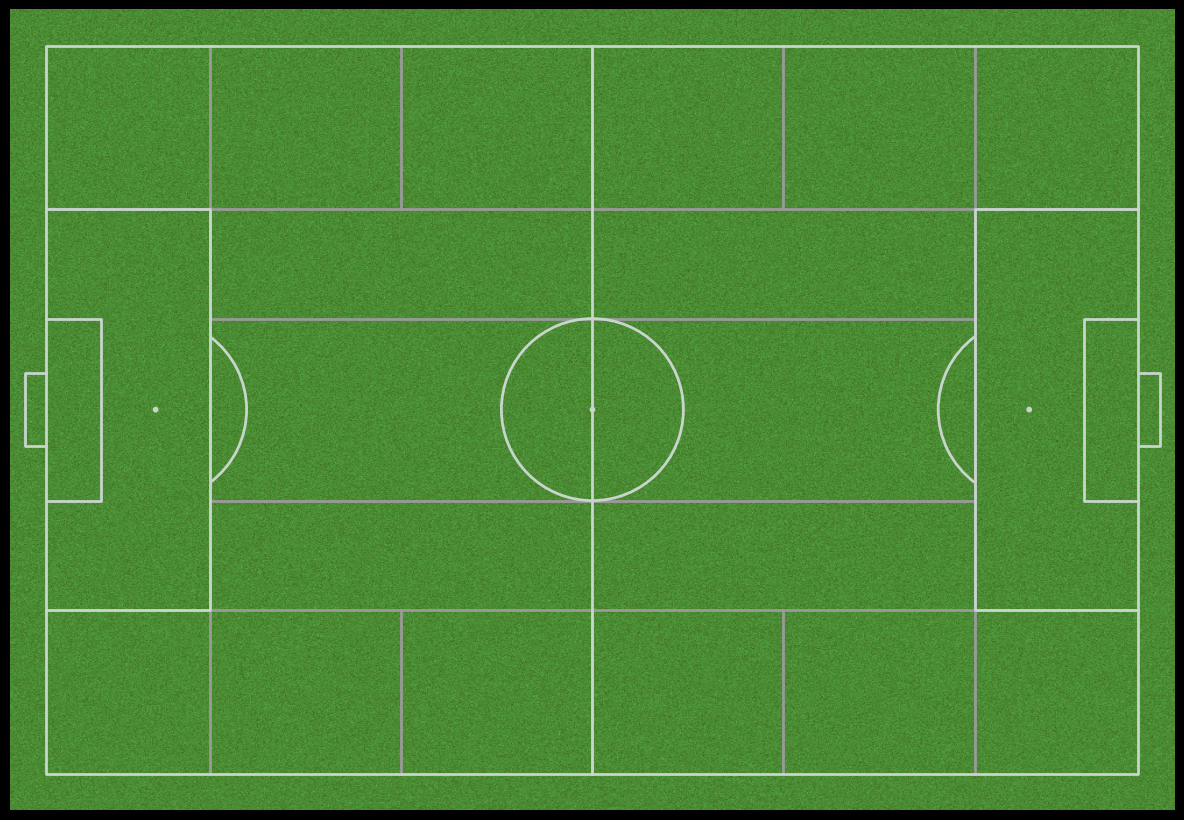

In [34]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)


# Create a Pass Map

Text(0.5, 1.0, 'Spain Passes')

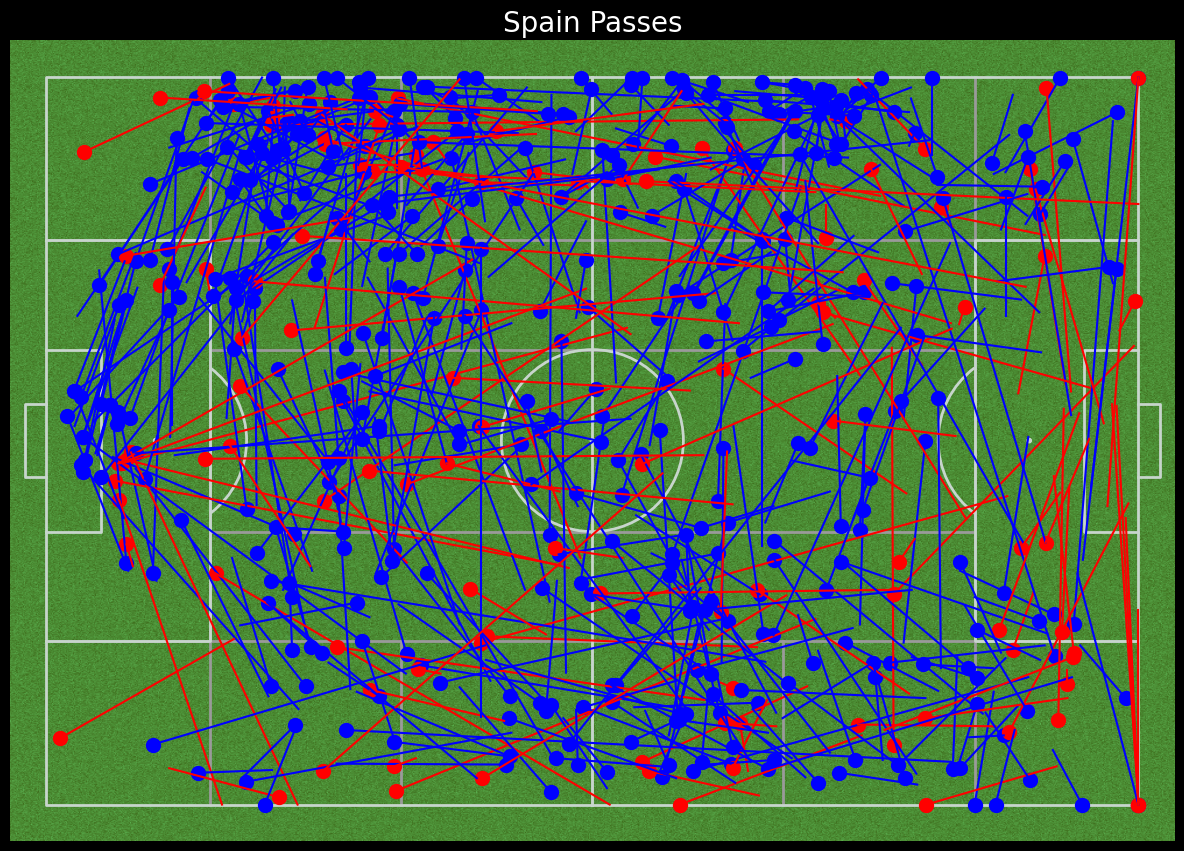

In [18]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(spain_passes['id'])):
    #We can choose period 1, 2 or both
    if spain_passes['period'].iloc[x] == 1 or spain_passes['period'].iloc[x] == 2:
        if any([spain_passes['pass.outcome.name'].iloc[x] == 'Incomplete', spain_passes['pass.outcome.name'].iloc[x] == 'Out', 
                spain_passes['pass.outcome.name'].iloc[x] == 'Unknown', spain_passes['pass.outcome.name'].iloc[x] == 'Pass Offside',
                spain_passes['pass.outcome.name'].iloc[x] == 'Injury Clearance']):
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            
            plt.plot((spain_passes['location'].iloc[x][0],spain_passes['pass.end_location'].iloc[x][0]),\
                     (spain_passes['location'].iloc[x][1],spain_passes['pass.end_location'].iloc[x][1]),color='red')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='red', s=100)
        else:
            
            plt.plot((spain_passes['location'].iloc[x][0],spain_passes['pass.end_location'].iloc[x][0]),\
                     (spain_passes['location'].iloc[x][1],spain_passes['pass.end_location'].iloc[x][1]),color='blue')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='blue', s=100)
    
plt.title('Spain Passes',color='white',size=20)

# Apply filters to the Pass Map

Text(0.5, 1.0, 'Olga Carmona García Passes')

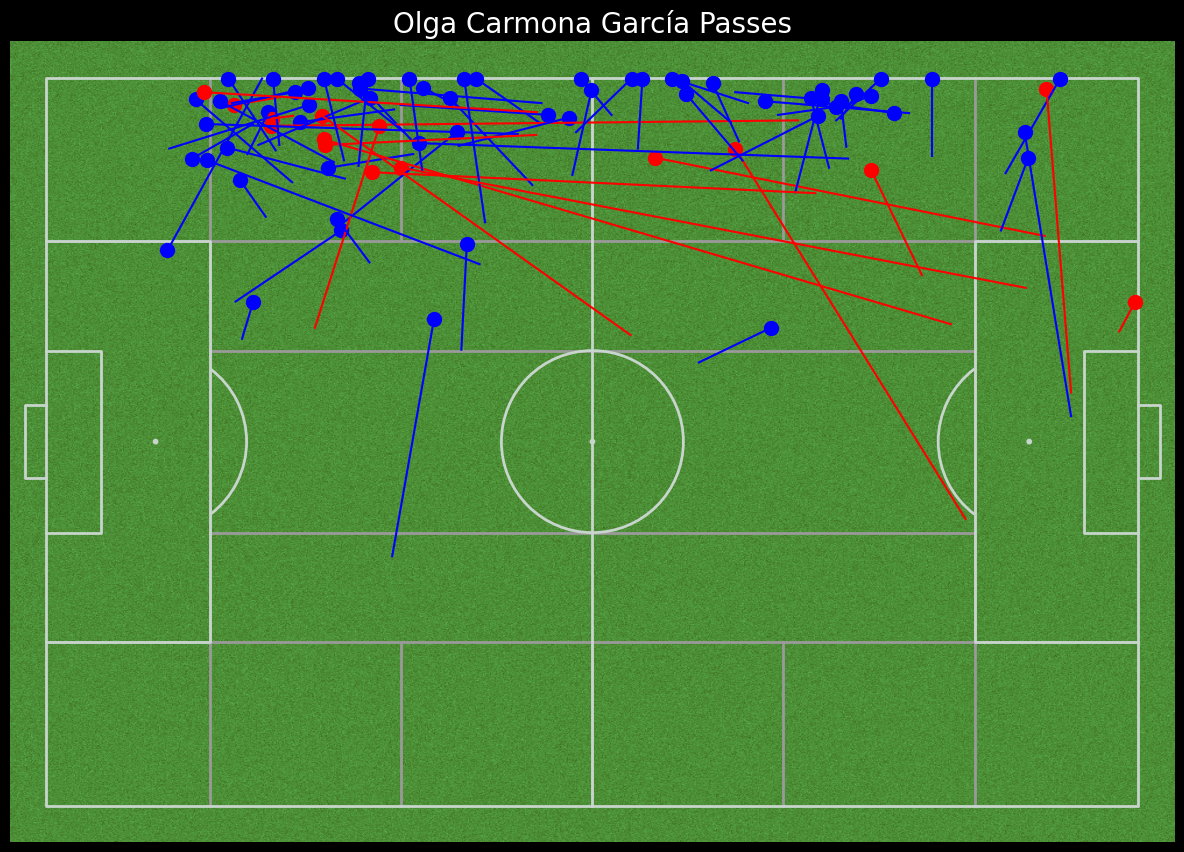

In [19]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(spain_passes['id'])):
    #We can choose period 1, 2 or both
    if (spain_passes['period'].iloc[x] == 2 or spain_passes['period'].iloc[x] == 1) and\
        (spain_passes['player.id'].iloc[x] == 49836.0):
        if any([spain_passes['pass.outcome.name'].iloc[x] == 'Incomplete', spain_passes['pass.outcome.name'].iloc[x] == 'Out', 
                spain_passes['pass.outcome.name'].iloc[x] == 'Unknown', spain_passes['pass.outcome.name'].iloc[x] == 'Pass Offside',
                spain_passes['pass.outcome.name'].iloc[x] == 'Injury Clearance']):
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            
            plt.plot((spain_passes['location'].iloc[x][0],spain_passes['pass.end_location'].iloc[x][0]),\
                     (spain_passes['location'].iloc[x][1],spain_passes['pass.end_location'].iloc[x][1]),color='red')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='red', s=100)
        else:
            
            plt.plot((spain_passes['location'].iloc[x][0],spain_passes['pass.end_location'].iloc[x][0]),\
                     (spain_passes['location'].iloc[x][1],spain_passes['pass.end_location'].iloc[x][1]),color='blue')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='blue', s=100)
    
plt.title('Olga Carmona García Passes',color='white',size=20)

In [20]:
(spain_passes['player.id'] == 49836).value_counts()

False    459
True      75
Name: player.id, dtype: int64

In [21]:
(spain_passes['player.id'] == 49836).value_counts(True)

False    0.859551
True     0.140449
Name: player.id, dtype: float64

# Create a Shots Map

In [22]:
#Filtering passes made by France

spain_shots = df.loc[(df['type.name'] == 'Shot') & (df['possession_team.name'] == "Spain Women's")]

#Let's look what we got

spain_shots.head()

id  index  period     timestamp  \
688   3d1dab89-c383-4479-b09e-6b58053f75ef    689       1  00:16:47.131   
691   51072651-8ceb-4af3-b096-b3af9ba5b44d    692       1  00:16:47.801   
1164  a7d3f03e-ae8e-4eb1-a70c-bbd9ce44d8e1   1165       1  00:28:29.842   
1475  e4ffb2b6-6f5f-4c09-862f-3b0a1184ee25   1476       1  00:36:30.928   
1573  e4c2de73-082c-4684-86db-0693bf95f64f   1574       1  00:38:49.070   

      minute  second  possession  duration  type.id type.name  \
688       16      47          41  0.391173       16      Shot   
691       16      47          41  0.432391       16      Shot   
1164      28      29          66  0.912924       16      Shot   
1475      36      30          78  0.552336       16      Shot   
1573      38      49          85  0.126190       16      Shot   

      possession_team.id possession_team.name  play_pattern.id  \
688                  863        Spain Women's                4   
691                  863        Spain Women's                4   
1164                 863        Spain Women's                1   
1475                 863        Spain Women's                3   
1573                 863        Spain Women's                4   

     play_pattern.name  team.id      team.name  tactics.formation  \
688      From Throw In      863  Spain Women's                NaN   
691      From Throw In      863  Spain Women's                NaN   
1164      Regular Play      863  Spain Women's                NaN   
1475    From Free Kick      863  Spain Women's                NaN   
1573     From Throw In      863  Spain Women's                NaN   

     tactics.lineup                                     related_events  \
688             NaN             [da13890b-5a23-4fb0-8d99-d8146b9b3333]   
691             NaN             [5f24efc5-bc88-4217-912b-2329a35fcdca]   
1164            NaN             [93cde46e-01b4-471a-8864-ebd47fd3da87]   
1475            NaN             [6c127ba8-6355-4638-9e6e-c9f956d877cd]   
1573            NaN  [86e07ac5-5d20-46f3-bd41-44d676d983ab, bf6c304...   

           location  player.id                player.name  position.id  \
688   [112.6, 37.2]   222682.0  Salma Paralluelo Ayingono         23.0   
691   [115.3, 46.7]    50151.0  Alba María Redondo Ferrer         17.0   
1164  [107.1, 24.5]    49836.0       Olga  Carmona García          6.0   
1475  [107.1, 50.8]    10165.0    Irene Paredes Hernandez          3.0   
1573  [103.5, 59.5]    50151.0  Alba María Redondo Ferrer         17.0   

          position.name  pass.recipient.id pass.recipient.name  pass.length  \
688      Center Forward                NaN                 NaN          NaN   
691          Right Wing                NaN                 NaN          NaN   
1164          Left Back                NaN                 NaN          NaN   
1475  Right Center Back                NaN                 NaN          NaN   
1573         Right Wing                NaN                 NaN          NaN   

      pass.angle  pass.height.id pass.height.name pass.end_location  \
688          NaN             NaN              NaN               NaN   
691          NaN             NaN              NaN               NaN   
1164         NaN             NaN              NaN               NaN   
1475         NaN             NaN              NaN               NaN   
1573         NaN             NaN              NaN               NaN   

      pass.body_part.id pass.body_part.name  pass.type.id pass.type.name  \
688                 NaN                 NaN           NaN            NaN   
691                 NaN                 NaN           NaN            NaN   
1164                NaN                 NaN           NaN            NaN   
1475                NaN                 NaN           NaN            NaN   
1573                NaN                 NaN           NaN            NaN   

     carry.end_location  pass.outcome.id pass.outcome.name  \
688                 NaN              NaN               NaN   
691          

Text(0.5, 1.0, 'Spain Shots')

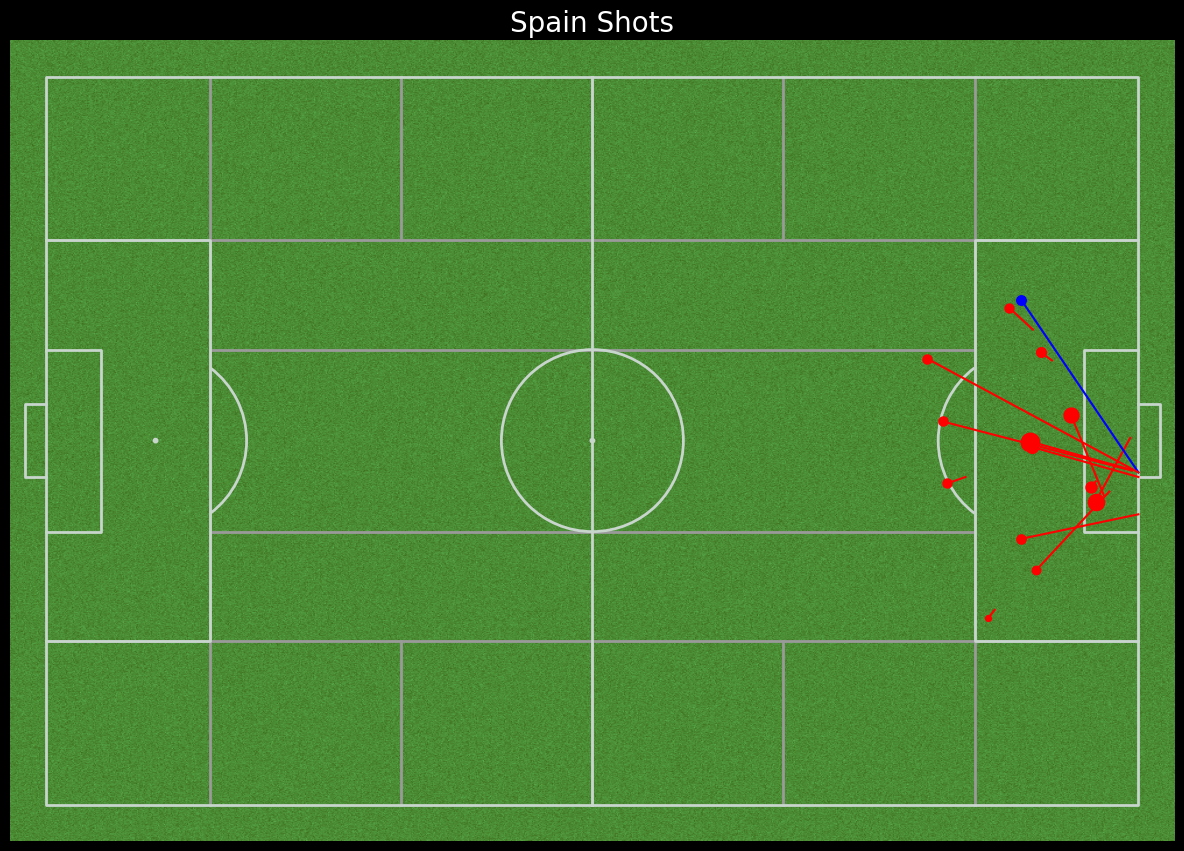

In [25]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(spain_shots['id'])):
    #We can choose period 1, 2 or both
    if spain_shots['period'].iloc[x] == 1 or spain_shots['period'].iloc[x] == 2:
        # Size of scatter will depend on xG
        size = np.sqrt(spain_shots['shot.statsbomb_xg'].iloc[x])*200
        if spain_shots['shot.outcome.name'].iloc[x] == 'Goal':
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            plt.plot((spain_shots['location'].iloc[x][0],spain_shots['shot.end_location'].iloc[x][0]),\
                     (spain_shots['location'].iloc[x][1],spain_shots['shot.end_location'].iloc[x][1]),color='blue')
            plt.scatter(spain_shots['location'].iloc[x][0],spain_shots['location'].iloc[x][1],s=size,color='blue')
        else:
            plt.plot((spain_shots['location'].iloc[x][0],spain_shots['shot.end_location'].iloc[x][0]),\
                     (spain_shots['location'].iloc[x][1],spain_shots['shot.end_location'].iloc[x][1]),color='red')
            plt.scatter(spain_shots['location'].iloc[x][0],spain_shots['location'].iloc[x][1],s=size,color='red')
    
plt.title('Spain Shots',color='white',size=20)